In [60]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import time

In [56]:
lfw = datasets.fetch_lfw_people(min_faces_per_person = 100 , resize = .4)

In [5]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [10]:
lfw['data'].shape , lfw['images'].shape , lfw['target'].shape

((1140, 1850), (1140, 50, 37), (1140,))

In [13]:
lfw['target_names']

array(['Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

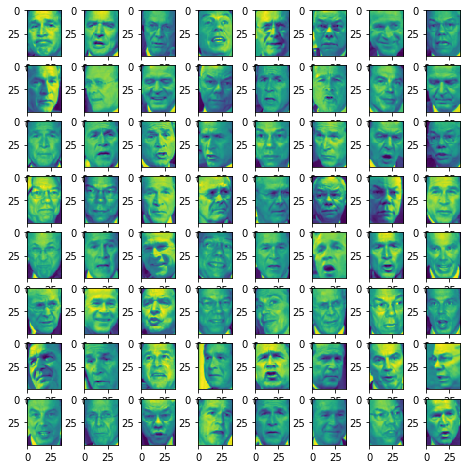

In [15]:
fig = plt.figure(figsize= (8 , 8))
for i in range(64):
    ax = fig.add_subplot(8 , 8 , i +1)
    ax.imshow(lfw.images[i] , cmap = plt.cm.bone)

In [33]:
x , y = lfw.data , lfw.target
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 0)
pca = PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pca.components_.shape

(855, 1850)

In [35]:
k = 0 
total = sum(pca.explained_variance_)
currentSum = 0 
while currentSum / total <.99:
    currentSum +=pca.explained_variance_[k]
    k =k+ 1
k

316

In [41]:
pca = PCA(n_components = k , whiten = True)
transformed = pca.fit_transform(x)
transformed.shape

(1140, 316)

In [44]:
x_approx = pca.inverse_transform(transformed)
x_approx = x_approx.reshape((1140 , 50 , 37))

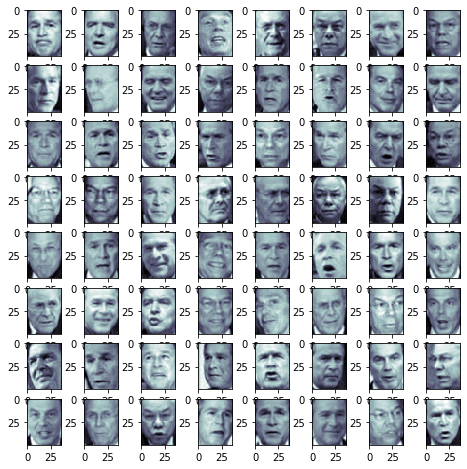

In [46]:
fig = plt.figure(figsize= (8 , 8))
for i in range(64):
    ax = fig.add_subplot(8 , 8 , i +1)
    ax.imshow(x_approx[i] , cmap = plt.cm.bone)

In [49]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_train.shape , x_test.shape

((855, 1850), (285, 1850))

In [68]:
rfc = RandomForestClassifier()
start = time.time()
rfc.fit(x_train , y_train)
print(time.time() - start)
y_pred = rfc.predict(x_test)
print(classification_report(y_pred , y_test))
rfc.score(x_test , y_test)


c:\users\sumeet\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.36558079719543457
              precision    recall  f1-score   support

           0       0.62      0.58      0.60        66
           1       0.25      0.53      0.34        17
           2       0.88      0.59      0.71       181
           3       0.13      0.44      0.20         9
           4       0.11      0.33      0.17        12

    accuracy                           0.57       285
   macro avg       0.40      0.49      0.40       285
weighted avg       0.73      0.57      0.62       285



0.5684210526315789

In [75]:
start = time.time()
rfc.fit(x_train_pca  ,y_train)
print(time.time() - start)
y_pred_pca = rfc.predict(x_test_pca)
print(classification_report(y_pred_pca , y_test))
rfc.score(x_test_pca , y_test)

0.2113020420074463
              precision    recall  f1-score   support

           0       0.41      0.40      0.40        63
           1       0.17      0.50      0.25        12
           2       0.83      0.51      0.63       198
           3       0.06      0.67      0.12         3
           4       0.11      0.44      0.18         9

    accuracy                           0.48       285
   macro avg       0.32      0.50      0.32       285
weighted avg       0.68      0.48      0.55       285



0.4842105263157895